In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
print(100)

100


In [22]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOGL'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [23]:
data.reset_index(inplace=True)

In [24]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.339840,16.720470,16.325577,16.651901,16.651901,146912940
1,2012-01-04,16.642391,16.773024,16.532032,16.723724,16.723724,114445440
2,2012-01-05,16.569820,16.615866,16.422173,16.491741,16.491741,131184684
3,2012-01-06,16.495245,16.516518,16.261011,16.266768,16.266768,107608284
4,2012-01-09,16.178679,16.191191,15.546296,15.577077,15.577077,232671096
...,...,...,...,...,...,...,...
2756,2022-12-14,95.199997,96.870003,93.599998,95.070000,95.070000,28733600
2757,2022-12-15,93.129997,93.639999,90.010002,90.860001,90.860001,40107000
2758,2022-12-16,90.760002,91.330002,89.519997,90.260002,90.260002,58011800
2759,2022-12-19,90.260002,90.559998,88.209999,88.440002,88.440002,29493000


In [25]:
ma_100_days = data.Close.rolling(100).mean()

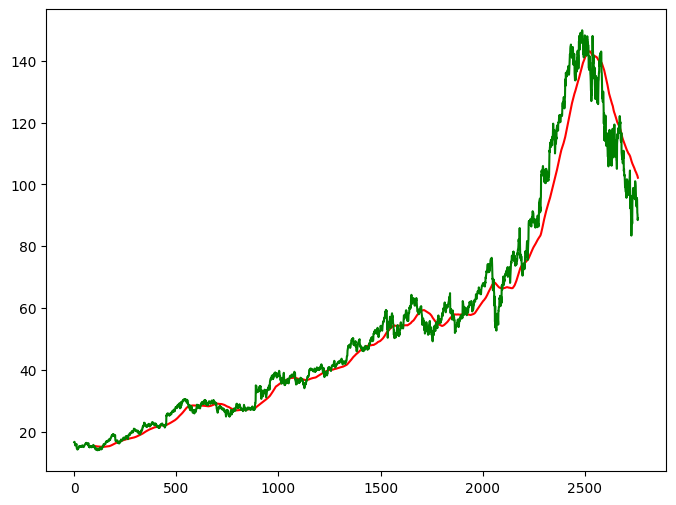

In [26]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [27]:
ma_200_days = data.Close.rolling(200).mean()

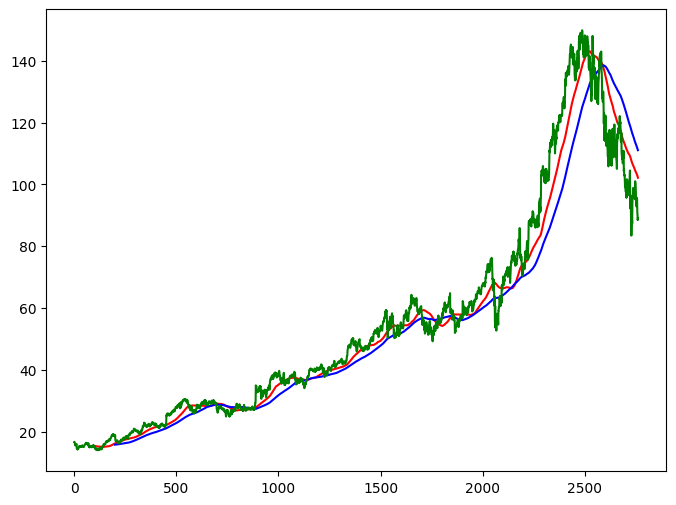

In [28]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [29]:
data.dropna(inplace=True)

In [30]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [31]:
data_train.shape[0]

2208

In [32]:
data_test.shape[0]

553

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [34]:
data_train_scale = scaler.fit_transform(data_train)

In [35]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [36]:
x, y = np.array(x), np.array(y)

In [37]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [38]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\praja\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 373ms/step - loss: 0.0690
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 390ms/step - loss: 0.0078
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 394ms/step - loss: 0.0060
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 387ms/step - loss: 0.0055
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 380ms/step - loss: 0.0059
Epoch 6/50
15/66 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - loss: 0.0042

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [37]:
pas_100_days = data_train.tail(100)

In [38]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [40]:
data_test_scale  =  scaler.fit_transform(data_test)

In [43]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [44]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 42ms/step


In [49]:
scale =1/scaler.scale_

In [50]:
y_predict = y_predict*scale

In [51]:
y = y*scale

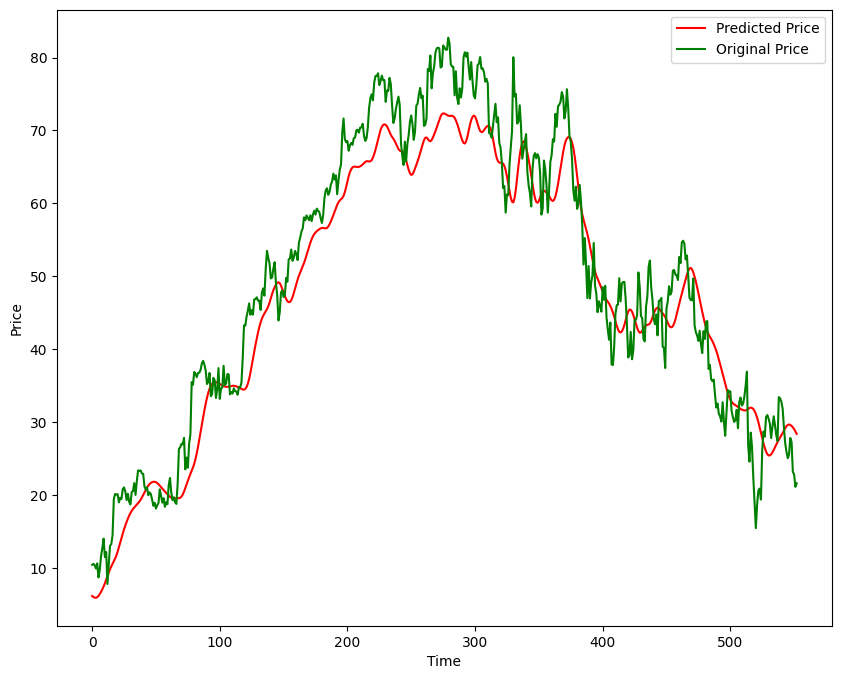

In [53]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [54]:
model.save('Stock Predictions Model.keras')